In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import pandas as pd
#loding data from mouse.csv
df = pd.read_csv('mouse(N50).csv')
df1 = pd.read_csv('mouse(N70).csv')

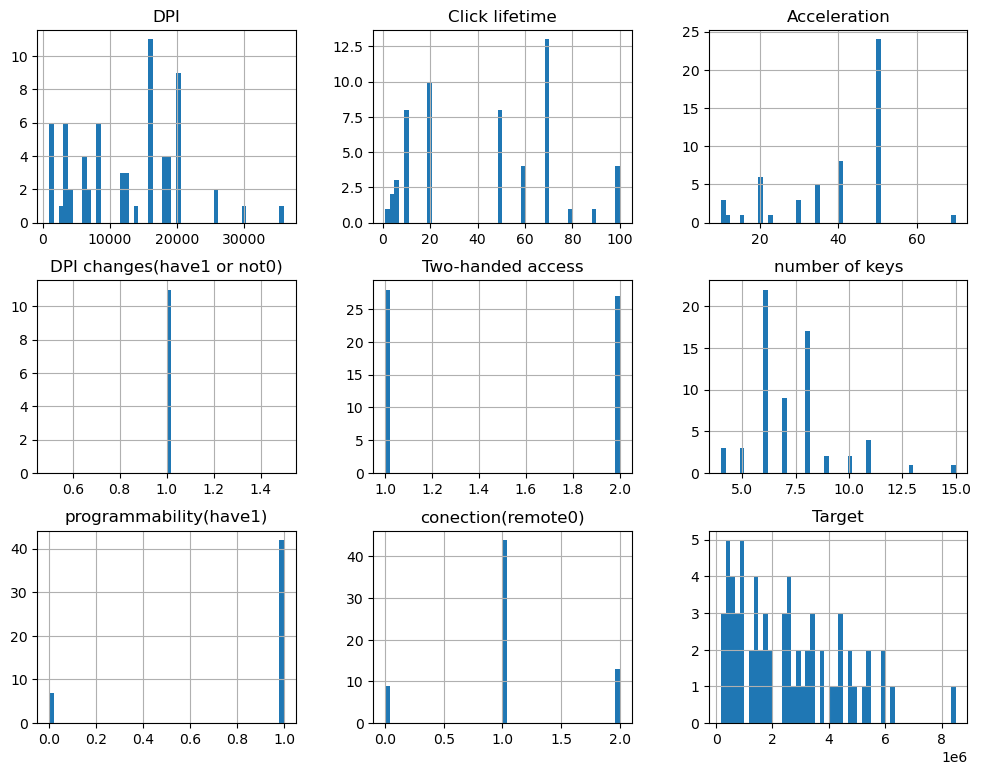

In [2]:
df1.hist(bins=50,figsize=(12,9))
plt.show()

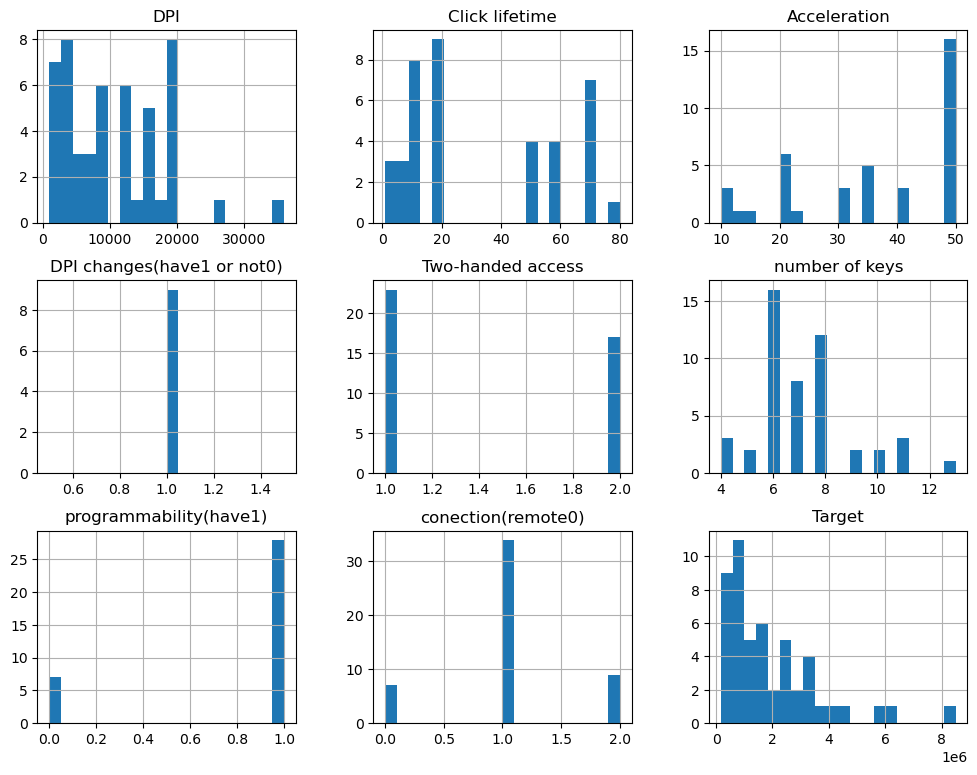

In [3]:
df.hist(bins=20,figsize=(12,9))
plt.show()

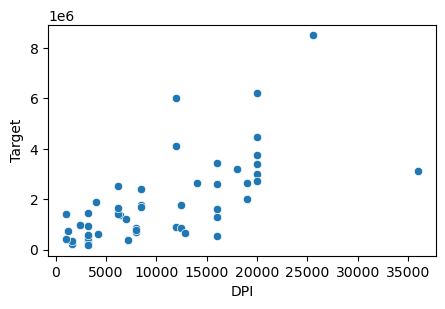

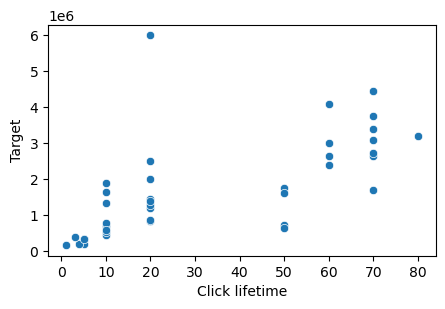

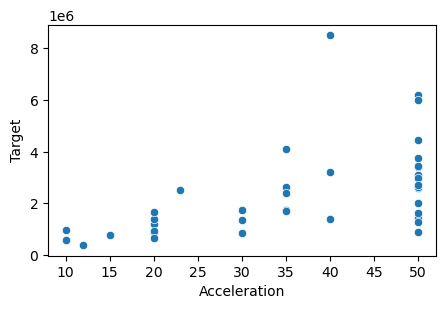

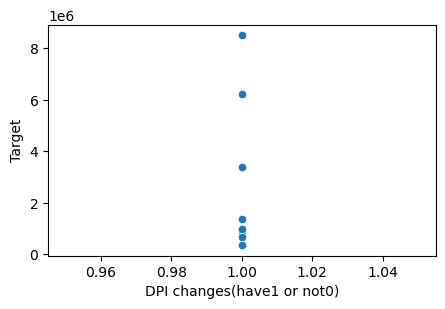

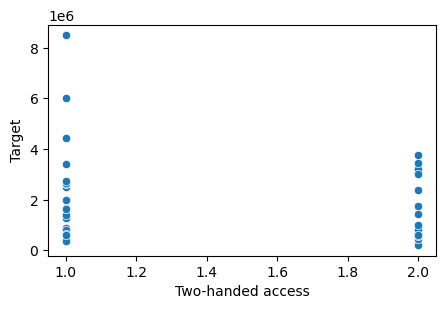

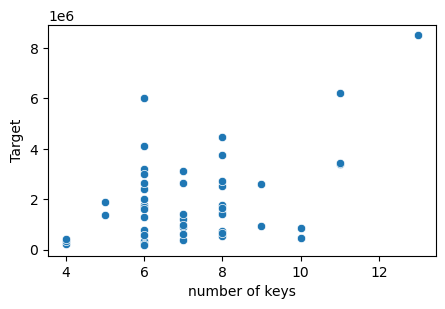

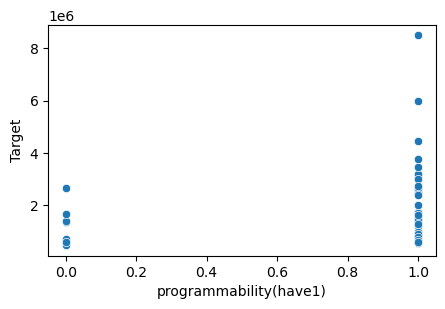

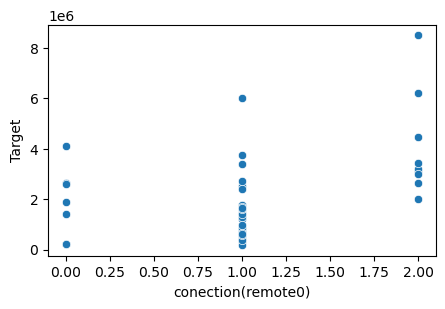

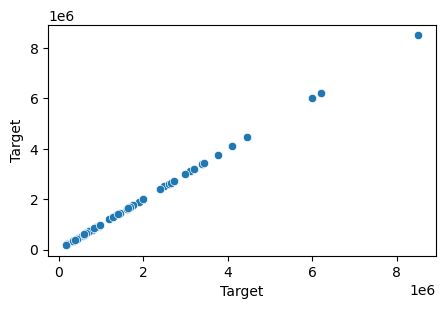

In [4]:
import seaborn as sns
for feature in df:
    plt.figure(figsize=(5,3))
    sns.scatterplot(data=df,x=feature,y='Target')

In [5]:
#number of feature programmability, show which is not usefull
# if programmability is 1 it means that has this option
print(len(df[df['programmability(have1)']==0]),'>=<',
len(df[df['programmability(have1)']==1]))

7 >=< 28


In [6]:
#delete inefficient column from feature columns
df=df.drop(columns='DPI changes(have1 or not0)')
#delete unusefull feature
df=df.drop(columns='programmability(have1)')
#replace the Nun number with median of its columns
df['Click lifetime'].fillna(df['Click lifetime'].median(),inplace=True)
df['Two-handed access'].fillna(df['Two-handed access'].median(),inplace=True)
#df['programmability(have1)'].fillna(df['programmability(have1)'].median(),inplace=True)
df['Acceleration'].fillna(df['Acceleration'].median(),inplace=True)
df['number of keys'].fillna(df['number of keys'].median(),inplace=True)

In [7]:
a,b=df.shape
#chosing the target and feature
Y=df.iloc[:,b-1:b]
X=df.iloc[:,:b-1]

In [8]:
#detecting of noise data and deleting them
from sklearn.ensemble import IsolationForest
detector = IsolationForest(contamination=0.1,random_state=42)
detector.fit(X)
y_pred_noise = detector.predict(X)
h=y_pred_noise
#define list of noise data for ploting
noise=[]
noisey=[]
#set copy of X and Y to pass the Iterate error
Xnew=X
Ynew=Y
print(X.shape)
print(y_pred_noise)
#find(from X Y) and add noise data in noiselist beasd on y_pred_noise
for x in range(len(y_pred_noise)):
    if y_pred_noise[x]==-1:      
        noise.append(Xnew.iloc[x])
        noisey.append(Ynew.iloc[x])
        X=X.drop(x)
        Y=Y.drop(x)

(50, 6)
[ 1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1]


In [9]:
df.describe()

,DPI,Click lifetime,Acceleration,Two-handed access,number of keys,conection(remote0),Target
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,10634.000000,30.260000,35.400000,1.340000,7.220000,1.040000,1.936000e+06
std,7693.692354,23.997287,12.809435,0.478518,1.865804,0.569998,1.711354e+06
min,1000.000000,1.000000,10.000000,1.000000,4.000000,0.000000,1.700000e+05
25%,3400.000000,10.000000,30.000000,1.000000,6.000000,1.000000,7.075000e+05
50%,8500.000000,20.000000,35.000000,1.000000,7.000000,1.000000,1.425000e+06
75%,16000.000000,50.000000,50.000000,2.000000,8.000000,1.000000,2.650000e+06
max,36000.000000,80.000000,50.000000,2.000000,13.000000,2.000000,8.500000e+06


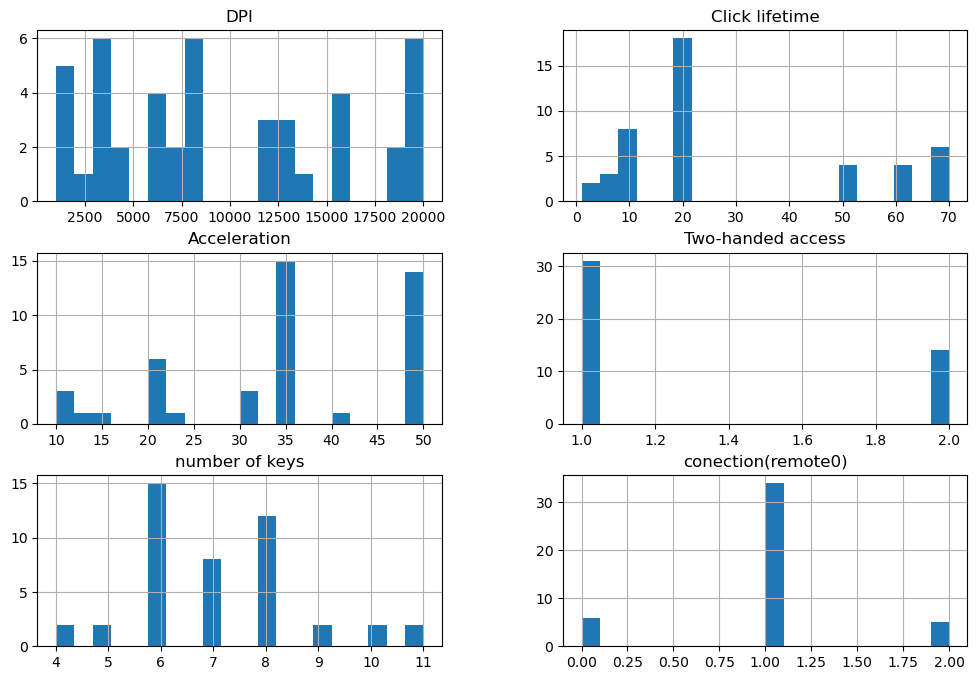

In [10]:
X.hist(bins=20,figsize=(12,8))
plt.show()

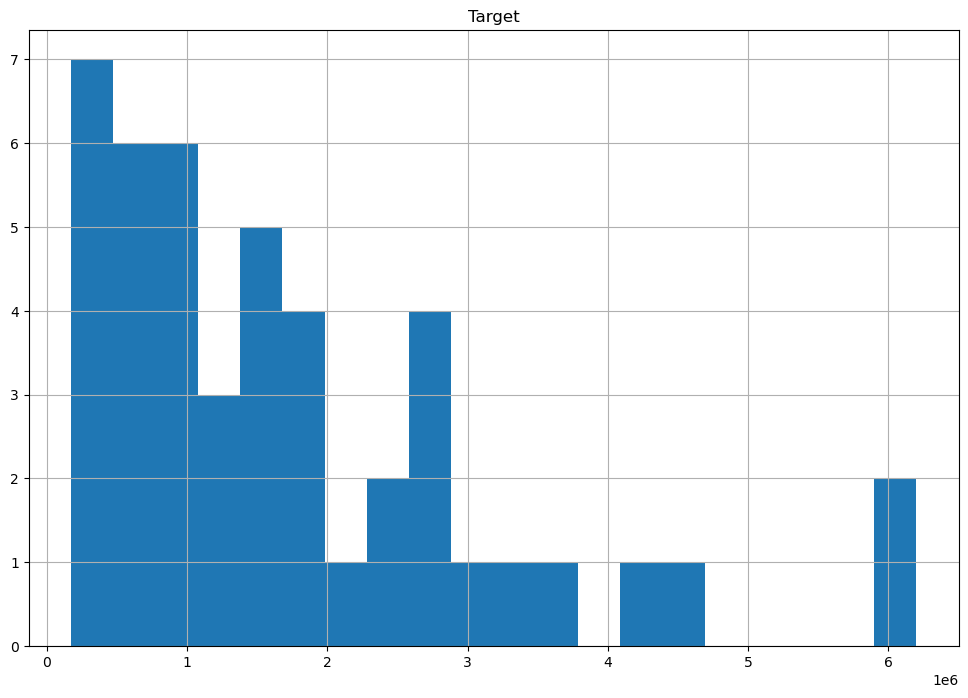

In [11]:
Y.hist(bins=20,figsize=(12,8))
plt.show()

In [12]:
#select the first column of feature to ploting
noise_x=[x.iloc[0] for x in noise]
noise_y=[x.iloc[0] for x in noisey]

In [13]:
#from sklearn.preprocessing import RobustScaler

#Rscale=RobustScaler().fit(X)
#X=Rscale.transform(X)

In [14]:
x, X_test, y, y_test = train_test_split(X, Y/100000, test_size=.2,shuffle=True,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
X_test=scaler.transform(X_test)

In [16]:
#define function to use cross val score to return mean of r2 and mae 
def trn(model,x,y,cv):  
    mae_score=cross_val_score(model,x,y,cv=cv,scoring='neg_mean_absolute_error')
    r2_score=cross_val_score(model,x,y,cv=cv,scoring='r2')  
    return mae_score.mean(),r2_score.mean()

In [17]:
#list of hyperparameter for traing data 
listhpar=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
knn_mae=[]
knn_r2=[]
for hp in listhpar:
    Kfold=KFold(n_splits=3,shuffle=True,random_state=42)
    knn=KNeighborsRegressor(n_neighbors=hp)
    mae,r2=trn(knn,x,y,Kfold)
    knn_mae.append(-1*mae)
    knn_r2.append(r2)  

(np.float64(0.0), np.float64(16.0), np.float64(-1.0), np.float64(0.6))

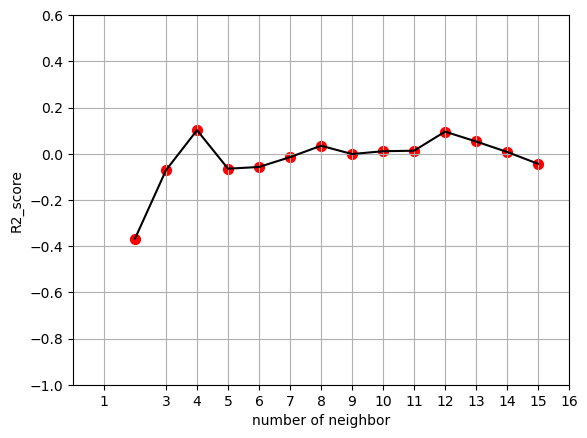

In [18]:
import matplotlib.pyplot as plt
plt.plot(listhpar,knn_r2,color='black')
plt.scatter(listhpar,knn_r2,color='r',s=50)
plt.grid()
plt.xticks([1,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.xlabel('number of neighbor')
plt.ylabel('R2_score')
plt.axis([0,16,-1,0.6])

In [19]:
#x, X_test, y, y_test = train_test_split(X, Y, test_size=.2,shuffle=True)

In [20]:
from sklearn.metrics import r2_score
kn=KNeighborsRegressor(n_neighbors=2)
kn.fit(x,y)
pred=kn.predict(X_test)
predy=kn.predict(x)
print(f'The r2 score of test data\n',r2_score(y_test,pred),mean_absolute_error(y_test,pred))
print(f'The r2 score of Traning data\n',r2_score(y,predy),mean_absolute_error(y,predy))
print(pred)
print(y_test)

The r2 score of test data
 -0.2519184397204397 9.386111111111111
The r2 score of Traning data
 0.6767077980800549 5.969444444444445
[[37.25 ]
 [ 8.9  ]
 [15.3  ]
 [19.5  ]
 [22.75 ]
 [36.4  ]
 [33.3  ]
 [12.975]
 [10.5  ]]
    Target
44    26.5
29     3.5
30    16.9
48    16.5
39    41.0
46    16.2
4     17.5
15     7.0
9     14.0


# SVR

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
Kfold=KFold(n_splits=3,shuffle=True)
C= np.logspace(-2, 5, 8)
gamma = np.logspace(-2, 5, 8)
pgrid = dict(gamma=gamma, C=C)
grid = GridSearchCV(SVR(), param_grid=pgrid, cv=Kfold)

In [22]:
print(C,gamma)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05] [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [23]:
grid.fit(x,y)

,estimator,SVR()
,param_grid,"{'C': array([1.e-02...e+04, 1.e+05]), 'gamma': array([1.e-02...e+04, 1.e+05])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [24]:
grid.best_params_

{'C': np.float64(100.0), 'gamma': np.float64(0.01)}

In [25]:
grid.best_score_

np.float64(0.27438546198988406)

In [26]:
results = grid.cv_results_

In [27]:
print(results.keys())
#print(results['param_C'],'\n',results['param_gamma'])
#print(results['mean_test_score'])
print(results['param_C'])
print(results['mean_test_score'])
print(results['split1_test_score'])

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0
 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 1000.0 1000.0 1000.0
 1000.0 1000.0 1000.0 1000.0 1000.0 10000.0 10000.0 10000.0 10000.0
 10000.0 10000.0 10000.0 10000.0 100000.0 100000.0 100000.0 100000.0
 100000.0 100000.0 100000.0 100000.0]
[-0.22217355 -0.22133428 -0.22266848 -0.22263626 -0.22271881 -0.22272141
 -0.22272141 -0.22272141 -0.21725614 -0.20897646 -0.22220684 -0.22187437
 -0.2226954  -0.22272141 -0.22272141 -0.22272141 -0.17106268 -0.08873005
 -0.21762643 -0.2126258  -0.22051424 -0.22077571 -0.22077571 -0.22077571
  0.22659689  0.24091032 -0.0818704  -0.08567953 -0.13301093 -0.13592395
 -0.135

# Decision Trees

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
max_depth=[2,3,4,5,6,7,8,9,10,11,12,13]
Dtree=DecisionTreeRegressor(max_depth=6)
Dtree.fit(x,y)
predd=Dtree.predict(X_test)
r2_score(y_test,predd)

print(sum(abs(np.ravel(y_test)-predd)/len(y_test)),mean_absolute_error(y_test,predd))

5.755555555555556 5.755555555555556


In [29]:
Dtree_mae=[]
Dtree_r2=[]
for hp in max_depth:
    Kfold=KFold(n_splits=2,shuffle=True,random_state=42)
    Dtree=DecisionTreeRegressor(max_depth=hp,random_state=42)
    mae,r2=trn(Dtree,x,y,Kfold)
    Dtree_mae.append(-1*mae)
    Dtree_r2.append(r2) 

In [30]:
d=np.array(Dtree_r2)
d

array([ 0.24497858, -0.03034279, -0.07470648,  0.06819857,  0.0710832 ,
        0.11904159,  0.11904159,  0.11904159,  0.11904159,  0.11904159,
        0.11904159,  0.11904159])

In [31]:
print(Dtree_r2,'\n\n',Dtree_mae)

[np.float64(0.2449785819054065), np.float64(-0.03034279346880231), np.float64(-0.07470648077975395), np.float64(0.06819856810814617), np.float64(0.07108320109781008), np.float64(0.1190415927824015), np.float64(0.1190415927824015), np.float64(0.1190415927824015), np.float64(0.1190415927824015), np.float64(0.1190415927824015), np.float64(0.1190415927824015), np.float64(0.1190415927824015)] 

 [np.float64(9.441319444444446), np.float64(9.393009259259259), np.float64(9.716666666666669), np.float64(9.550462962962964), np.float64(9.509722222222223), np.float64(9.39861111111111), np.float64(9.39861111111111), np.float64(9.39861111111111), np.float64(9.39861111111111), np.float64(9.39861111111111), np.float64(9.39861111111111), np.float64(9.39861111111111)]


# radnom forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regg=RandomForestRegressor(n_estimators=15,min_samples_leaf=1,max_depth=10)
y=np.ravel(y)
regg.fit(x,y)
predr=regg.predict(X_test)
predt=regg.predict(x)
print(f'r2 score of traning',r2_score(y,predt),'\n',f'r2 score of testing data',
r2_score(y_test,predr))

r2 score of traning 0.8122272403176803 
 r2 score of testing data 0.6276236578415577


In [33]:
x, X_test, y, y_test = train_test_split(X, Y, test_size=.2,shuffle=True,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
max_depth=[20,40,60,80,100]
Rtree_mae=[]
Rtree_r2=[]
for hp in max_depth:
    Kfold=KFold(n_splits=3,shuffle=True,random_state=42)   
    regr=RandomForestRegressor(n_estimators=hp,min_samples_leaf=2,max_depth=3)
    maer,r2r=trn(regr,x,y,Kfold)
    Rtree_mae.append(-1*maer)
    Rtree_r2.append(r2r)
print(Rtree_mae,'\n',Rtree_r2)

[np.float64(889112.320877425), np.float64(905633.6671912194), np.float64(854666.0013083623), np.float64(872848.642183944), np.float64(868300.838501776)] 
 [np.float64(-0.396050446310908), np.float64(-0.08481628055956676), np.float64(-0.11608671631043059), np.float64(-0.13476505944597486), np.float64(-0.008281665906305746)]







# linear with polynomialfeature

In [35]:
from sklearn.linear_model import Ridge

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(30)
New=poly.fit_transform(x)
Newt=poly.transform(X_test)

xn=np.concatenate((x,New),axis=1)
Xn_test=np.concatenate((X_test,Newt),axis=1)

In [37]:
clf=Ridge()
clf.fit(xn,y)
pred=clf.predict(Xn_test)
predt=clf.predict(xn)
print(r2_score(y,predt))
print(r2_score(y_test,pred),'\n',
mean_absolute_error(y_test,pred))

0.531556729862022
-0.06048536728183507 
 731486.0660080396


In [38]:
import lightgbm as lgb
lgbreg=lgb.LGBMRegressor(objective='regression',
    num_leaves=50,
    max_depth=2,
    learning_rate=1,
    n_estimators=10)
lgbreg.fit(x,y)
predy=lgbreg.predict(X_test)
predt=lgbreg.predict(x)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 36, number of used features: 0
[LightGBM] [Info] Start training from score 1734444.444444
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

In [39]:
Lightgbm=r2_score(y_test,predy)
print(r2_score(y_test,predy)
,'\n',mean_absolute_error(y_test,predy))

print(r2_score(y,predt)
,'\n',mean_absolute_error(y,predt))

-0.0010476518629580767 
 699259.2592592593
0.0 
 1169320.9876543207


# ADAboost

In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
base=DecisionTreeRegressor(max_depth=30,min_samples_leaf=1)
y = np.ravel(y)
y_test=np.ravel(y_test)
adaboost=AdaBoostRegressor(base,n_estimators=10,learning_rate=0.8)
adaboost.fit(x,y)
predy=adaboost.predict(X_test)
predt=adaboost.predict(x)
ADAboost=r2_score(y_test,predy)
print(r2_score(y,predt),mean_absolute_error(y,predt))
print(r2_score(y_test,predy),mean_absolute_error(y_test,predy))
print(predy,'\n',y_test)

0.9976474344135259 17916.666666666668
0.4041165733868489 640000.0
[2000000.  350000. 2400000. 1400000. 2400000. 1280000. 2400000. 1750000.
  990000.] 
 [2650000  350000 1690000 1650000 4100000 1620000 1750000  700000 1400000]


In [41]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
base=DecisionTreeRegressor(max_depth=30,min_samples_leaf=1)
y = np.ravel(y)
y_test=np.ravel(y_test)
adaboost=AdaBoostRegressor(base)
learning_rate=[0.001,0.01,0.1,1]
n_estimators=[1,10,100,1000]
parametr_adaboost=dict(learning_rate=learning_rate,n_estimators=n_estimators)

Grid=GridSearchCV(adaboost,parametr_adaboost,scoring='r2')
Grid.fit(x,y)


,estimator,AdaBoostRegre...max_depth=30))
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [1, 10, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [42]:
print(Grid.best_params_)
Grid.best_score_
re=Grid.cv_results_

{'learning_rate': 0.1, 'n_estimators': 10}


In [52]:

print(f"List of mean test score: \n {re['mean_test_score']}")
print(f"List of parameter of each score:\n {re['params']}")

List of mean test score: 
 [-2.04718733 -5.15308782 -0.80823776 -0.98289558 -4.8262093  -1.06259234
 -0.814072   -0.99453762 -2.0529777  -0.61789703 -0.7543939  -1.61752497
 -6.65284811 -1.14852332 -0.76384694 -0.92596256]
List of parametr of each score:
 [{'learning_rate': 0.001, 'n_estimators': 1}, {'learning_rate': 0.001, 'n_estimators': 10}, {'learning_rate': 0.001, 'n_estimators': 100}, {'learning_rate': 0.001, 'n_estimators': 1000}, {'learning_rate': 0.01, 'n_estimators': 1}, {'learning_rate': 0.01, 'n_estimators': 10}, {'learning_rate': 0.01, 'n_estimators': 100}, {'learning_rate': 0.01, 'n_estimators': 1000}, {'learning_rate': 0.1, 'n_estimators': 1}, {'learning_rate': 0.1, 'n_estimators': 10}, {'learning_rate': 0.1, 'n_estimators': 100}, {'learning_rate': 0.1, 'n_estimators': 1000}, {'learning_rate': 1, 'n_estimators': 1}, {'learning_rate': 1, 'n_estimators': 10}, {'learning_rate': 1, 'n_estimators': 100}, {'learning_rate': 1, 'n_estimators': 1000}]
